# A simple map

Here we will showcase a few ways to make a simple map. We'll download some ice thickness data from BedMap2 for the Amery Ice Shelf. 

Import the modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, regions, utils

Use the Antarctic-Plots `fetch` module to download the data and return the grid as an xarray.DataArrays

In [2]:
ice_thickness = fetch.bedmap2(
    layer="thickness",  # choose which layer to plot (e.g. 'surface', 'bed', 'icebase')
    region=regions.amery_ice_shelf,  # choose a pre-defined region, or set your own
    fill_nans=True,  # fill no data values with 0
)

C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


returning grid with new region and/or registration, same spacing


Create a simple map with default settings

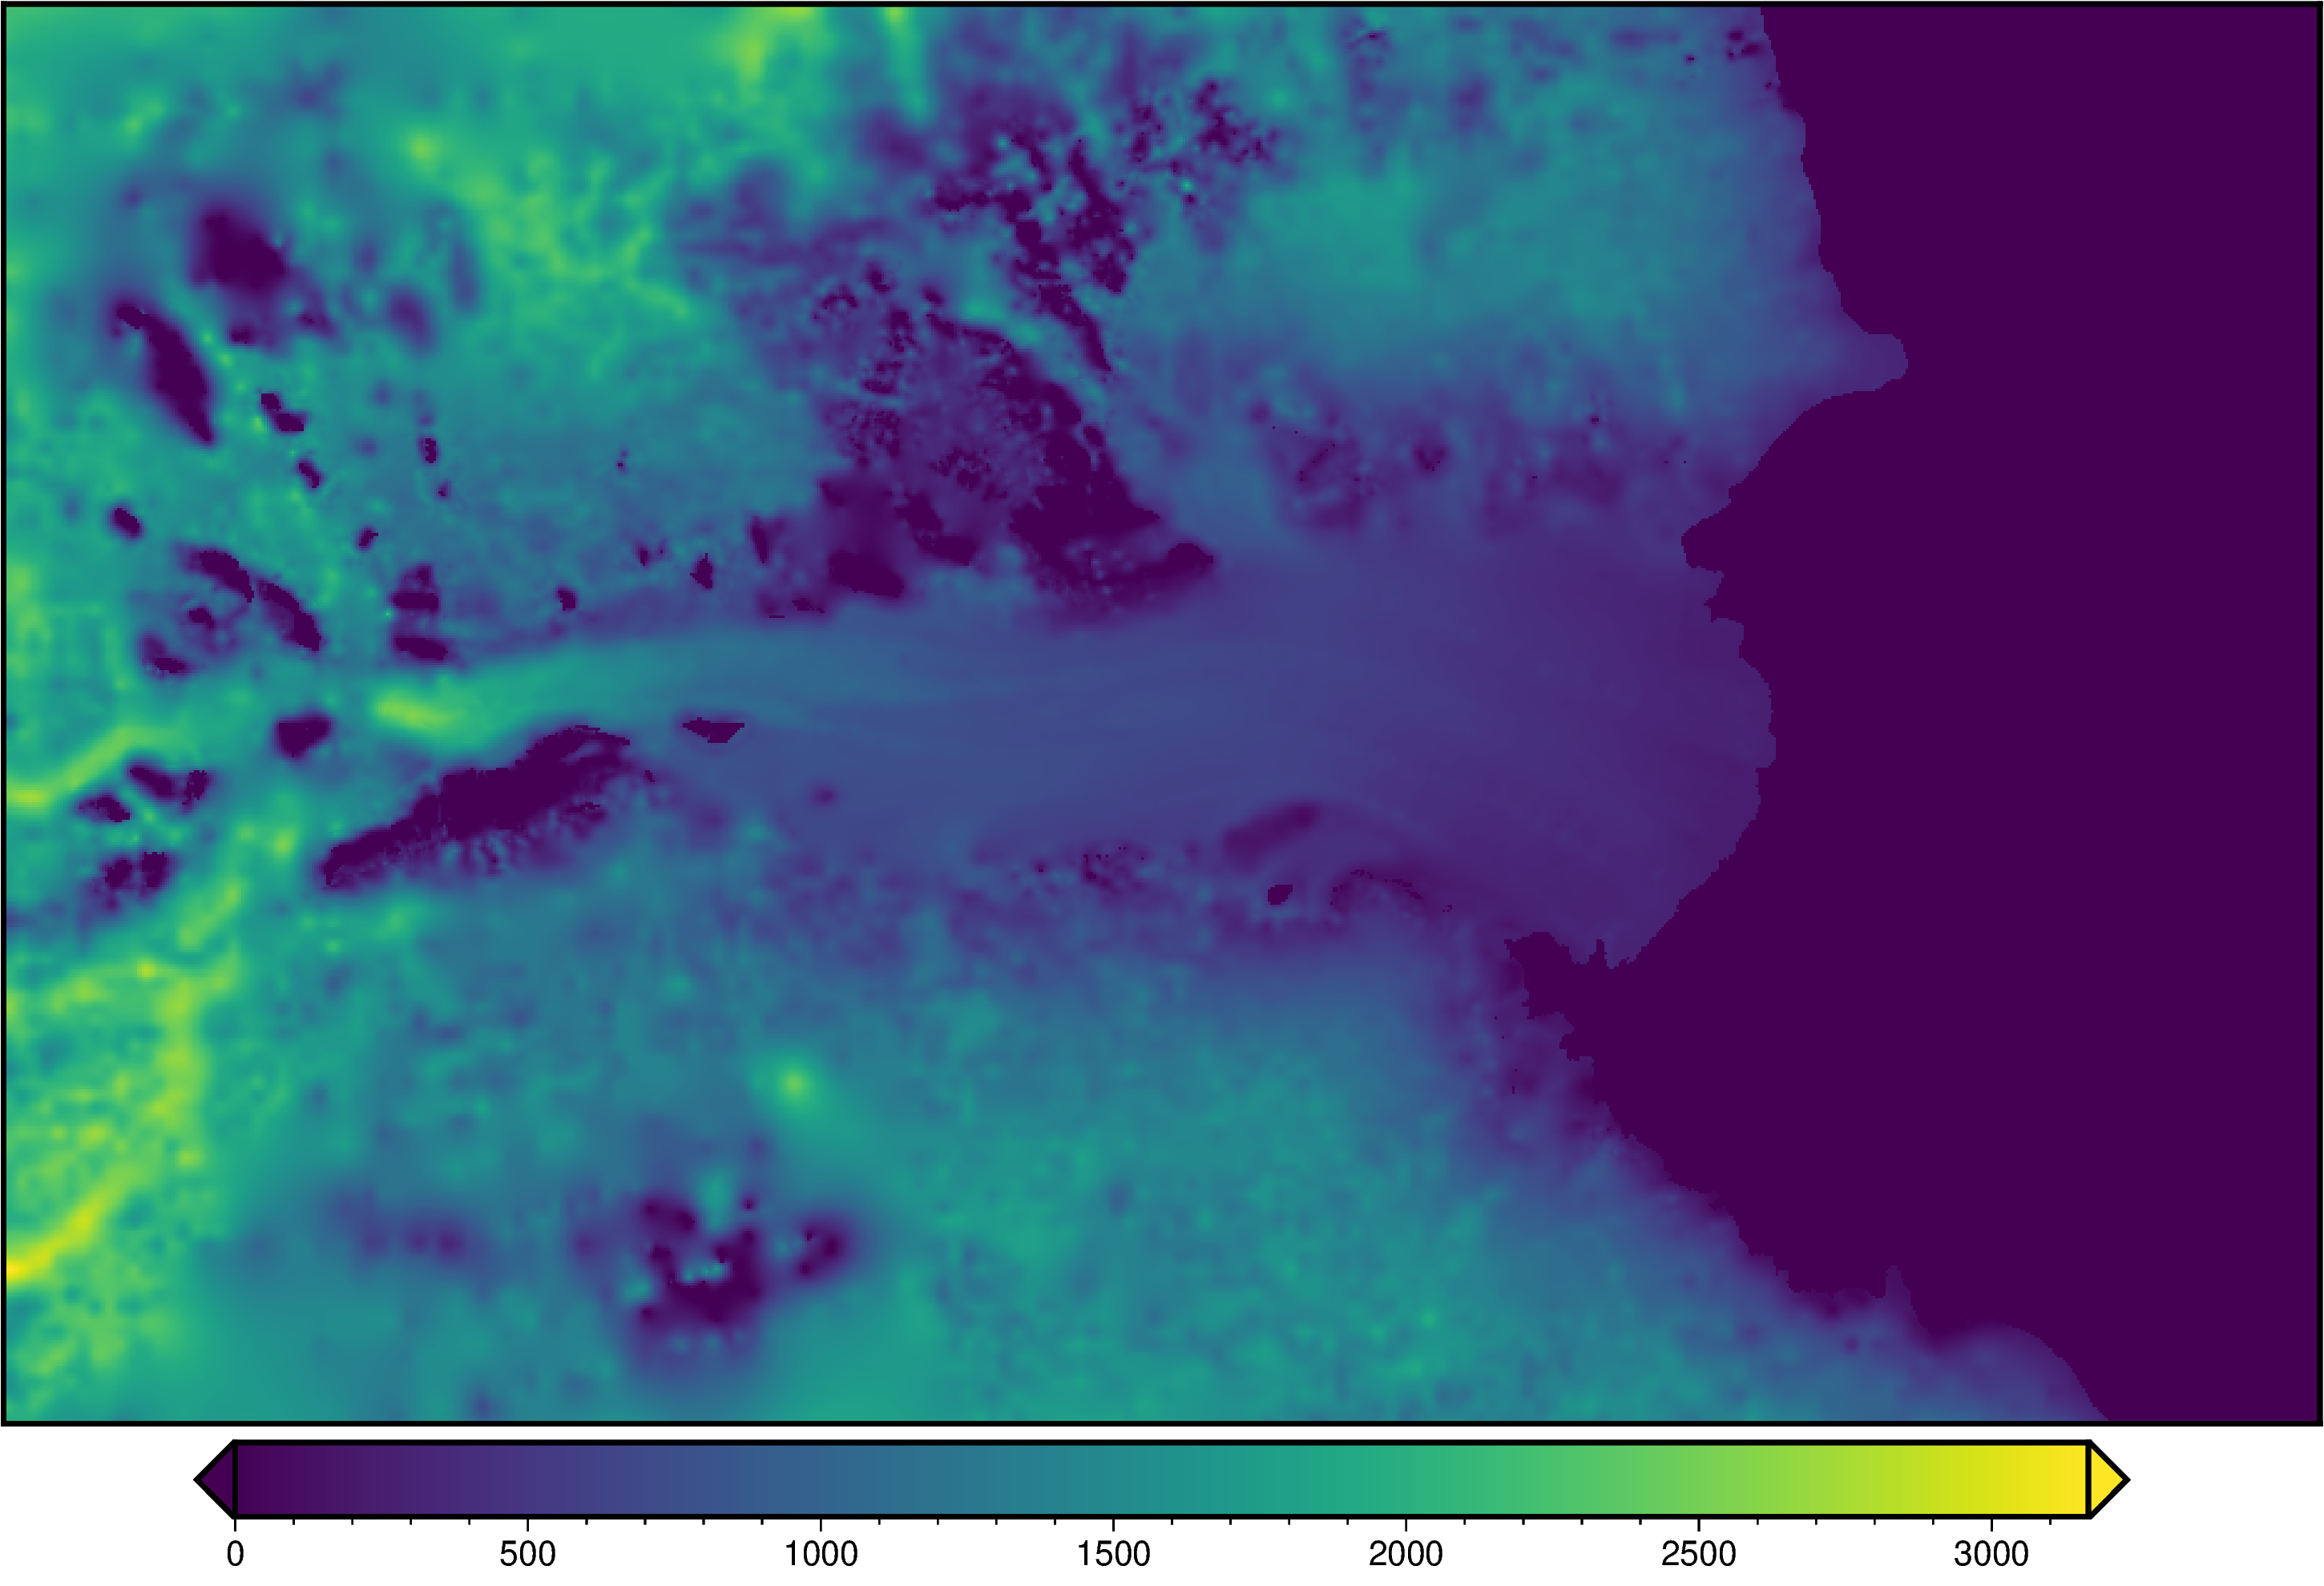

In [3]:
fig = maps.plot_grd(ice_thickness)

fig.show()

Change the colorscale (see available options at https://docs.generic-mapping-tools.org/6.2/cookbook/cpts.html) and add the coastline / groundingline

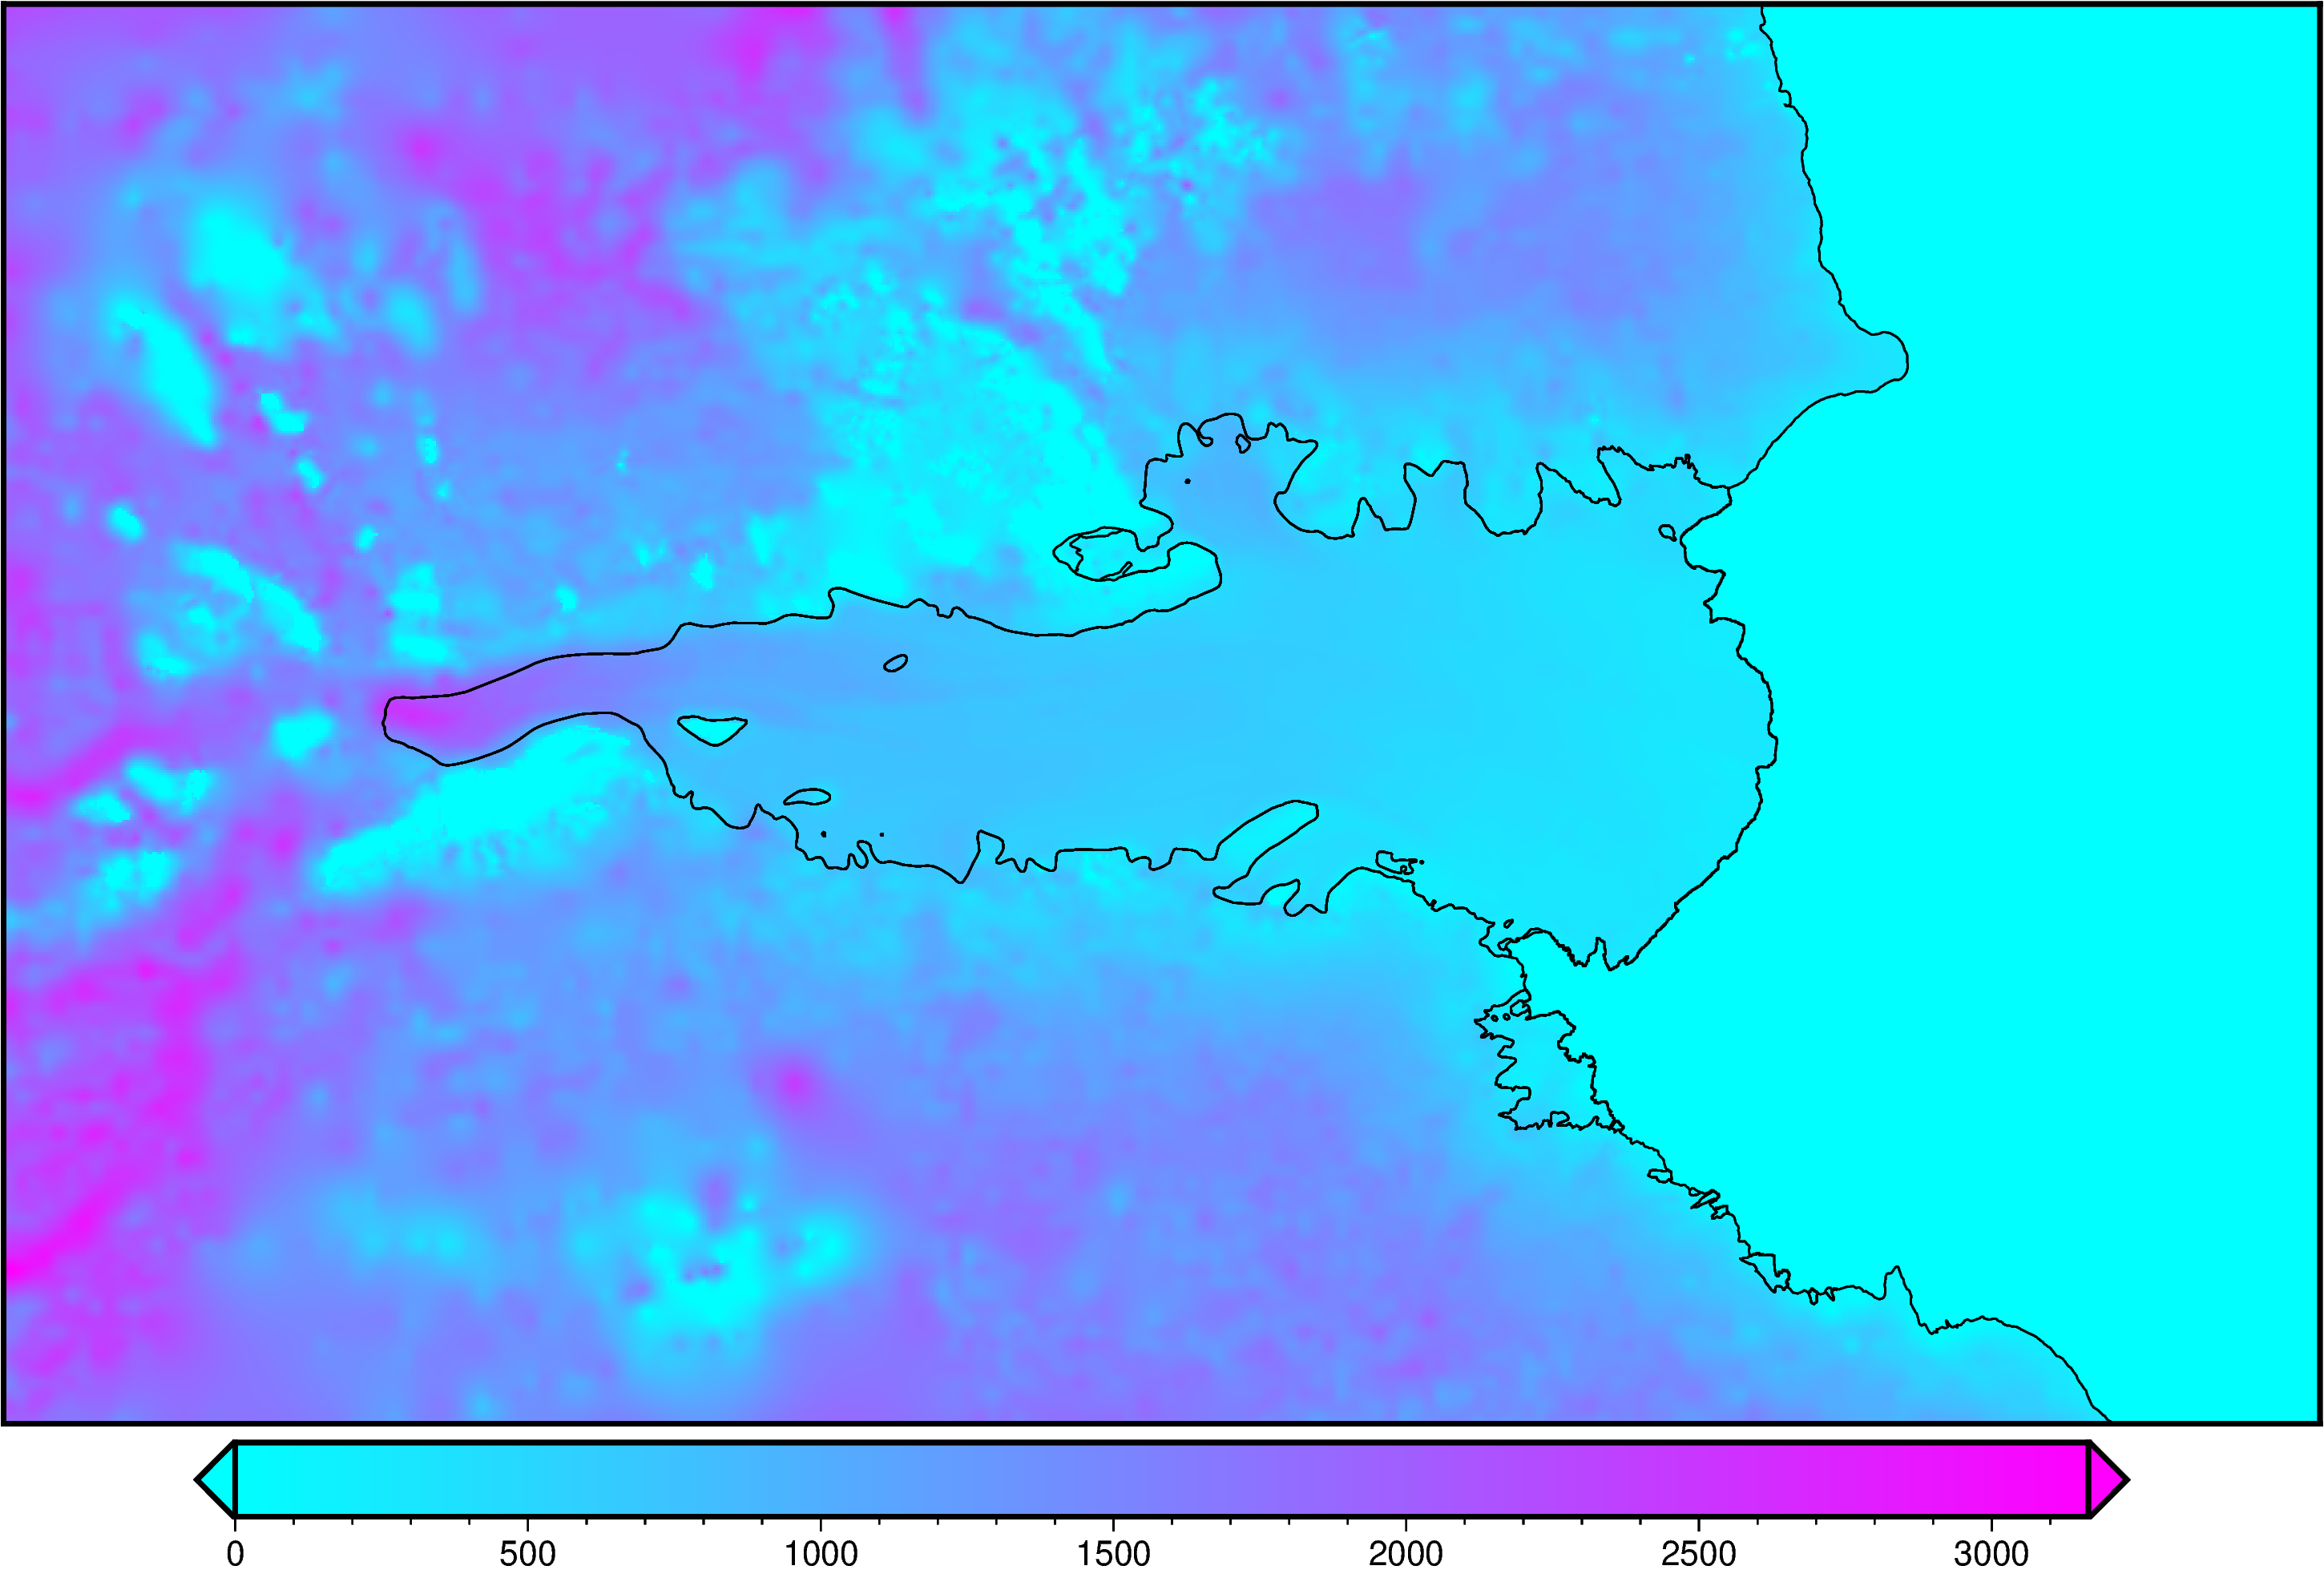

In [4]:
fig = maps.plot_grd(
    ice_thickness,
    cmap="cool",
)

# add the coastline and groundingline
maps.add_coast(fig)

fig.show()

Add additional features to the plot, all within the `plot_grd()` function

gmtset [WARNING]: Representation of font type not recognized. Using default.


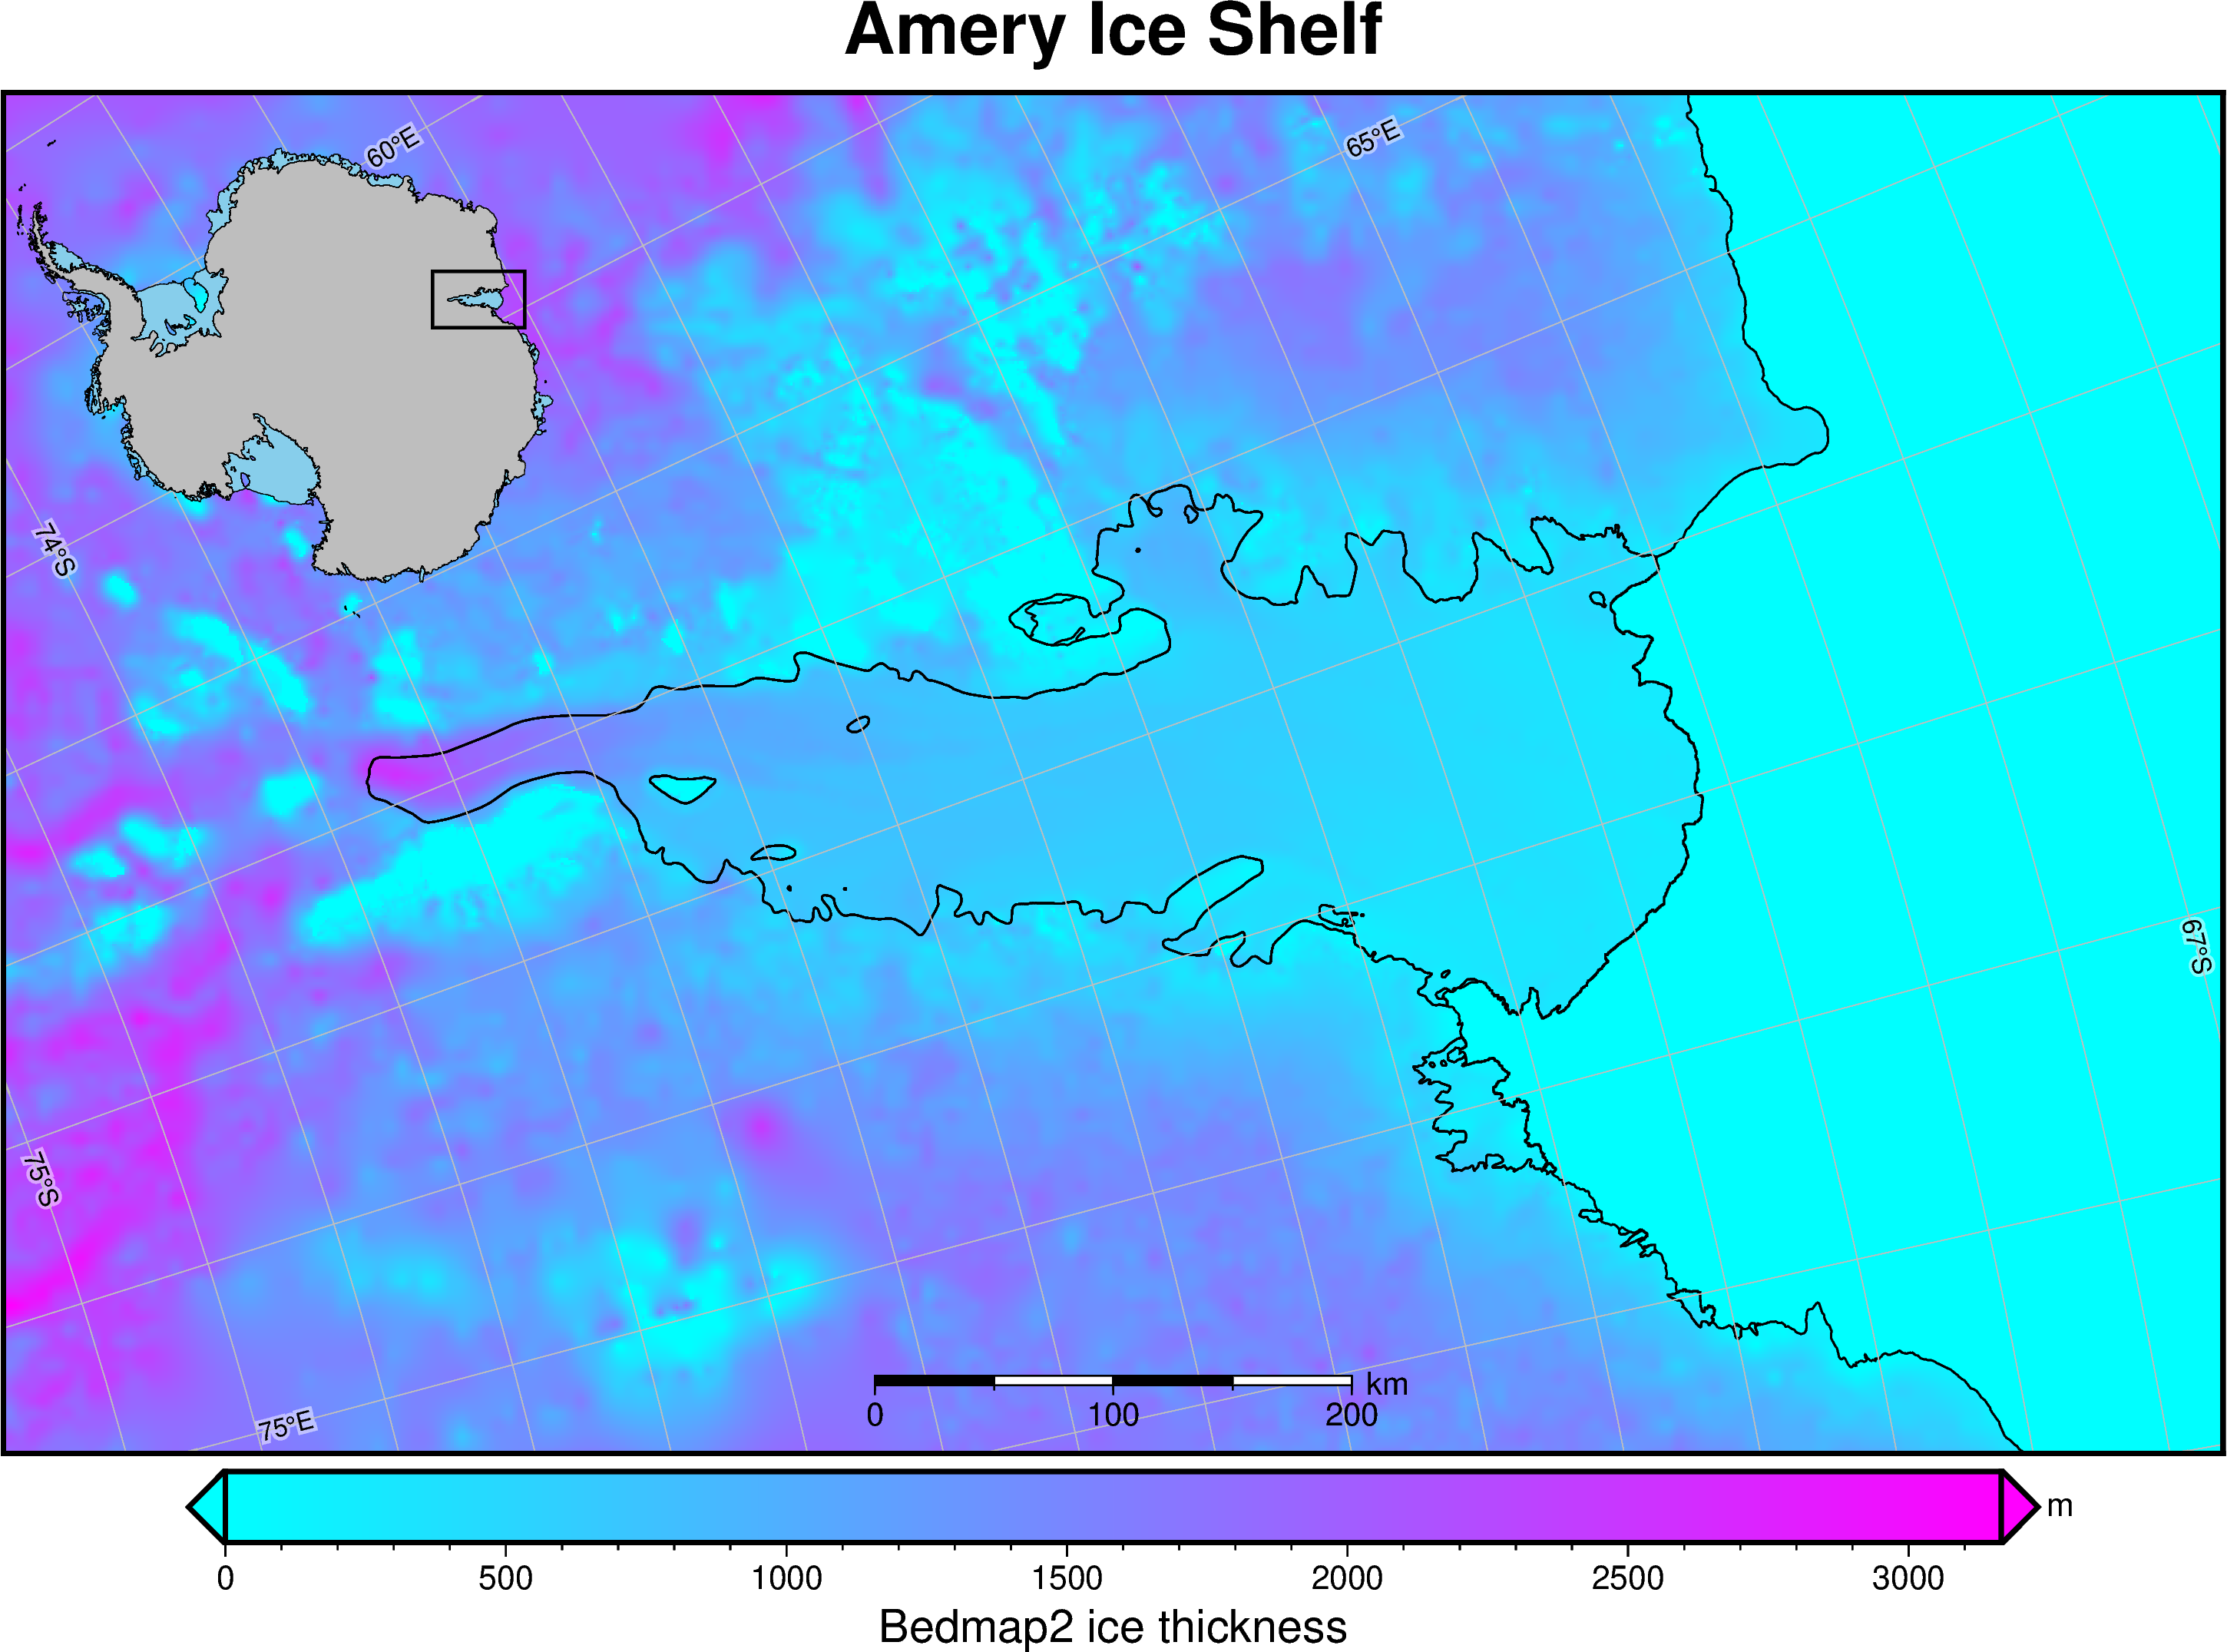

In [5]:
fig = maps.plot_grd(
    ice_thickness,
    cmap="cool",  # set the colormap
    coast=True,  # plot grounding and coastlines
    title="Amery Ice Shelf",
    cbar_label="Bedmap2 ice thickness",  # add label to colorbar
    cbar_unit="m",  # add units to y-axis of colorbar
    inset=True,  #  add inset map showing location
    scalebar=True,  # add scalebar
    gridlines=True,  # add lat/lon gridlines
    x_spacing=5,  # longitude interval (degrees)
    y_spacing=1,  # latitude interval (degrees)
)

# save the figure to use in the Gallery examples
# this follows the standard pygmt function `savefig()`
fig.savefig("outputs/basic_map.png")

# display the figure
fig.show()